In [1]:
%load_ext load_style
%load_style talk.css

# Matplotlib

In [2]:
from IPython.display import Image, HTML

[Matplotlib](http://matplotlib.org) is the main (static) graphic library for Scientific Python, it allows to create complex and publication-ready plots in a variety of formats (png, ps, pdf ...). It has a *Matlab - like* plotting as well as object-oriented API, you have *very* fine-grained control on everything on your graph (at the expense of being a bit *verbose*), relatively smooth learning curve if you come from *Matlab*, not so much from *R*.

In [3]:
HTML('<iframe src=http://matplotlib.org width=1000 height=400></iframe>')

The [Gallery](http://matplotlib.org/gallery.html) is your goto place when you are looking at creating a brand new 
graph using Matplotlib

In [4]:
HTML('<iframe src=http://matplotlib.org/gallery.html width=1000 height=400></iframe>')

Colormaps can be tricky, here are some examples and advice for using colormaps with Matplotlib

In [5]:
HTML('<iframe src=http://matplotlib.org/users/colormaps.html width=1000 height=400></iframe>')

In [6]:
import matplotlib
from matplotlib import pyplot as plt # conventional way to import the plotting interface of matplotlib
import numpy as np

### backends in matplotlib

Matplotlib can use different `backends`, in the first part of this notebook, we use the IPython inline backend, which is actually part of IPython

In [7]:
%matplotlib inline

In [8]:
print(matplotlib.rcParams['backend'])

module://ipykernel.pylab.backend_inline


In [9]:
matplotlib.rcsetup.all_backends

['GTK',
 'GTKAgg',
 'GTKCairo',
 'MacOSX',
 'Qt4Agg',
 'Qt5Agg',
 'TkAgg',
 'WX',
 'WXAgg',
 'CocoaAgg',
 'GTK3Cairo',
 'GTK3Agg',
 'WebAgg',
 'nbAgg',
 'agg',
 'cairo',
 'emf',
 'gdk',
 'pdf',
 'pgf',
 'ps',
 'svg',
 'template']

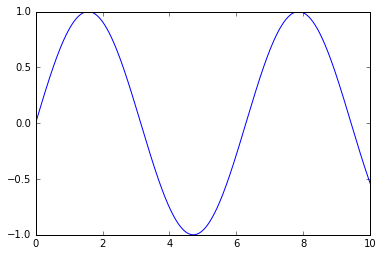

In [10]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x))

we can switch backends, but need to **restart the kernel** 

In the following we use the *notebook* backend, which provides some degree of control on the figure 
in the notebook itself

In [ ]:
import matplotlib
matplotlib.use('nbAgg')

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x))
plt.show()

we go back to inline plotting via the `%matplotlib inline` magic command

In [ ]:
%matplotlib inline

## Matlab-like interactive plotting

Matplotlib was originally designed to have an interface similar to that of matlab.
For this reason, the library maintains pointers to the currently active figure and
axes, and makes simple plots straightforward to create.  For example:

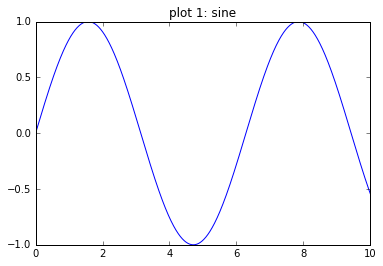

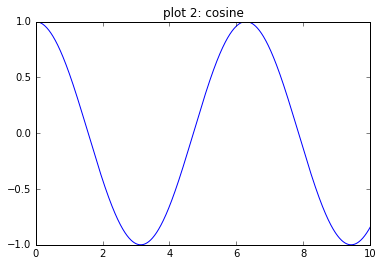

In [11]:
plt.figure()  # this is optional: if you just call plt.plot(), a figure will be created
plt.plot(x, np.sin(x))
plt.title('plot 1: sine')

plt.figure()
plt.plot(x, np.cos(x))
plt.title('plot 2: cosine')

## Object-oriented Matplotlib

This is fine for simple plots, but when you start wanting to do more powerful
things, it can get a little bit tricky.  A better way to approach it is to use the **Object-Oriented API** of Matplotlib

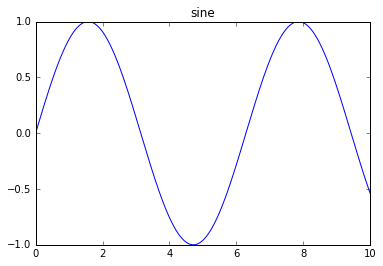

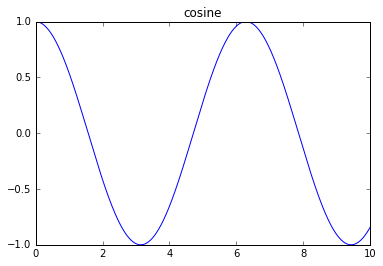

In [12]:
fig1 = plt.figure() # creates a figure object
ax1 = fig1.add_subplot(1, 1, 1) # creates an 'axes' object in this figure
ax1.plot(x, np.sin(x)) # create plot in ax
ax1.set_title('sine') # set properties of the axes

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.plot(x, np.cos(x))
ax2.set_title('cosine')

The big advantage of using the Object-Oriented API is more fined grained control, and also the fact that you can organise your code more (IMHO) logically, making for more readable code

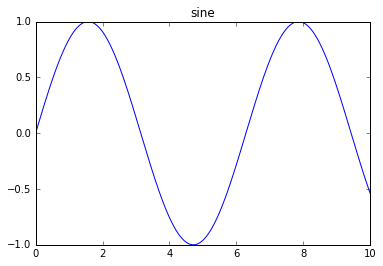

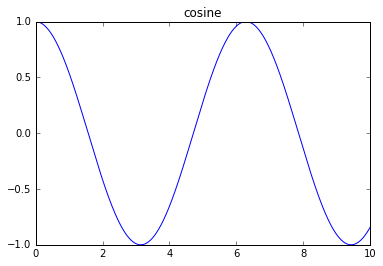

In [13]:
# creates the figure objects
fig1 = plt.figure()
fig2 = plt.figure()

# axes
ax1 = fig1.add_subplot(1, 1, 1)
ax2 = fig2.add_subplot(1, 1, 1)

# plot
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))

# set attributes
ax1.set_title('sine')
ax2.set_title('cosine')

In [14]:
x = np.linspace(-5, 5, 10)

y = x ** 2

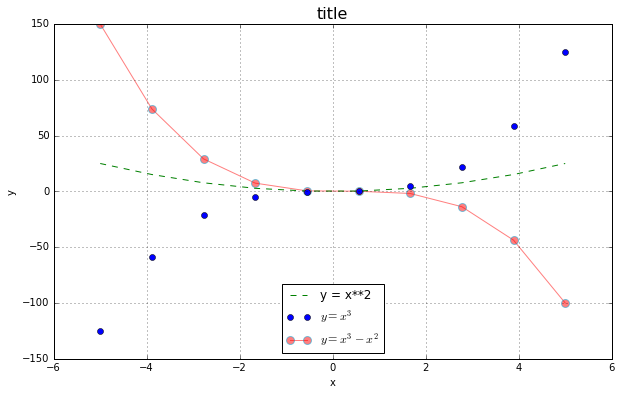

In [15]:
fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111)

ax.plot(x, x**2, 'g--', label="y = x**2")  
ax.plot(x, x**3, 'bo', label="$y = x^3$") # can use LaTex notation  
ax.plot(x, x**2 - x**3, 
        color='red',    # can also abbrev to c='g'
        linestyle='-',     # also ls=
        marker='o',        # can also be specified in the linespec
        markersize=8,     # note this is different from the scatter sizes
        markeredgecolor='#01A9DB', # can use html color codes (see http://html-color-codes.info/)
        markeredgewidth=1,
        alpha=0.5,         # sets the transparency
        zorder=-1,         # sets its position obove or below other items layering
        label="$y = x^3 - x^2$") # gives the legend name. When using legend() you don't have to give names

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title', fontsize=16)
ax.grid()
ax.legend(loc=0); # upper left corner

### Other Object Types

all plot elements in a matplotlib figure is associated to an object that can be passed around, manipulated, updated ... 

To illustrate this , we will go back to the `MacOSX` backend (`qt` for Windows): the plots should be displayed in a separate window

In [ ]:
%matplotlib osx 

In [ ]:
print matplotlib.rcParams['backend']

In a **script** you generally don't need to specify the backend, if you need to you can call: 
```
import matplotlib 
matplotlib.use('MacOSX ')
```

At the beginning of the script, **before** you import the pyplot interface with 

```
from matplotlib import pyplot as plt
```

See the list of available backends (interactive and non-interactive) at: 

[http://matplotlib.org/faq/usage_faq.html#what-is-a-backend](http://matplotlib.org/faq/usage_faq.html#what-is-a-backend)

**TIP**: if running a python + matplotlib script using *cron* on a Linux / Mac machine, you my need to use the 'Agg' backend

In [ ]:
x = np.linspace(0, 10, 1000)

fig, ax = plt.subplots()
lines = ax.plot(x, np.sin(x))
fig.show()

Now that we've created the plot, we can adjust the attributes of the `Line2D`
instance.  In general, any keyword in the ``plot`` command has an associated
``set_`` command.

After setting the different parameters, we can call the ``draw()`` method of
the figure canvas to make the plot reflect the changes.

In [ ]:
lines[0].set_color('red')
fig.canvas.draw()

In [ ]:
lines[0].set_linewidth(6)
fig.canvas.draw()

Other plot elements can be manipulated as well.  For example, text:

In [ ]:
txt = plt.text(3.5, 0.5, "Hello Wellington")

In [ ]:
txt.set_size(20)
txt.set_color('blue')
fig.canvas.draw()

You can also dynamically change the location of the text:

In [ ]:
txt.set_x(6)
txt.set_y(-0.5)
fig.canvas.draw()

Similarly, you can even dynamically change the locations of each point
in the line!  For example, changing the y data looks like this:

In [ ]:
lines[0].set_ydata(np.sin(2 * x))
fig.canvas.draw()

This sort of operation can be used to create simple animations -- for example:

In [ ]:
for i in range(100):
    lines[0].set_ydata(np.sin(x + 0.1 * i))
    fig.canvas.draw()

Please note that this is **NOT** a good way to create animations in
matplotlib.  For that rather use the purpose-build ``animation`` submodule.

see examples: 

[http://matplotlib.org/examples/animation/](http://matplotlib.org/examples/animation/)

In [ ]:
# back to the inline backend 
%matplotlib inline 

## styles in matplotlib (available from version 1.4)

In [16]:
from matplotlib import style

In [17]:
style.available

['seaborn-pastel',
 'bmh',
 'seaborn-colorblind',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-ticks',
 'seaborn-bright',
 'seaborn-muted',
 'seaborn-deep',
 'seaborn-darkgrid',
 'seaborn-white',
 'fivethirtyeight',
 'dark_background',
 'seaborn-poster',
 'classic',
 'grayscale',
 'ggplot',
 'seaborn-talk',
 'seaborn-dark',
 'seaborn-whitegrid',
 'seaborn-dark-palette']

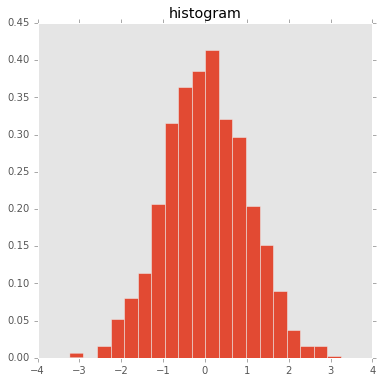

In [18]:
with style.context('ggplot'): # use context rather than style.use(), and use with as a context manager
    plt.figure(figsize=(6,6))
    plt.hist(np.random.randn(1000), bins=20, normed=True)
    plt.title('histogram')
    plt.grid()

[xkcd](http://xkcd.com/)-style plots in Matplotlib

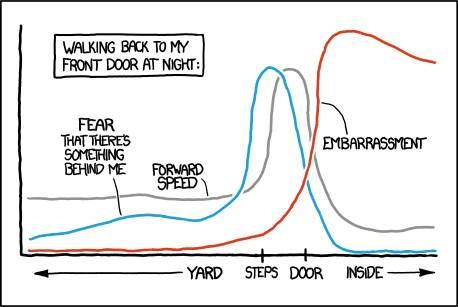

In [19]:
Image('http://imgs.xkcd.com/comics/front_door.png')

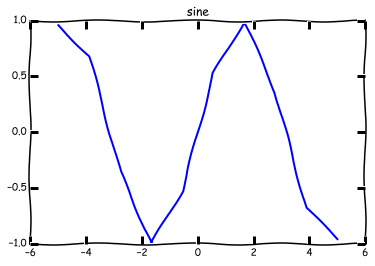

In [20]:
with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, np.sin(x))
    ax.set_title('sine')

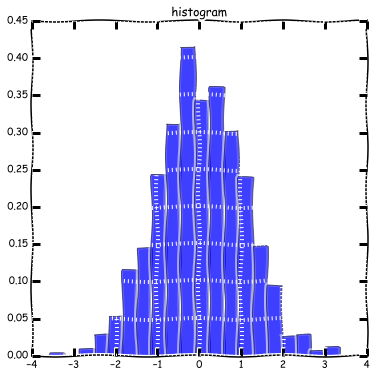

In [21]:
with plt.xkcd():
    plt.figure(figsize=(6,6))
    plt.hist(np.random.randn(1000), bins=20, normed=True, color='b', alpha=0.5)
    plt.title('histogram')
    plt.grid()

you can combine xkcd plots and styles

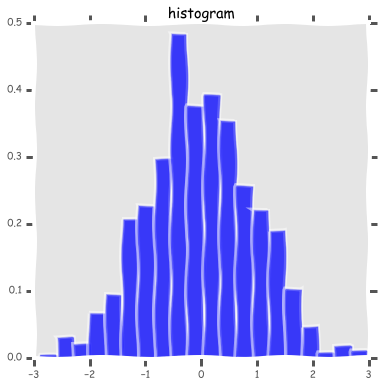

In [22]:
with plt.xkcd():
    with style.context('ggplot'): 
        plt.figure(figsize=(6,6))
        plt.hist(np.random.randn(1000), bins=20, normed=True, color='b', alpha=0.5)
        plt.title('histogram')
        plt.grid()

## subplots and layouts

### simple subplots: `plt.subplots()`

In [23]:
x = np.linspace(0, 10, 1000)

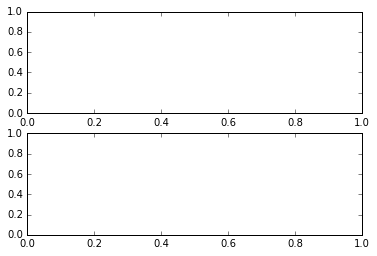

In [24]:
f, axes = plt.subplots(nrows=2, ncols=1)

In [25]:
type(axes)

numpy.ndarray

In [26]:
axes.shape

(2,)

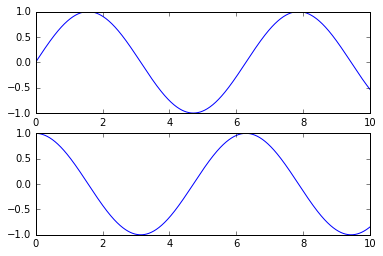

In [27]:
f, axes = plt.subplots(nrows=2, ncols=1)
axes = axes.flatten()
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))

### more complex layouts: `plt.subplot2grid() `

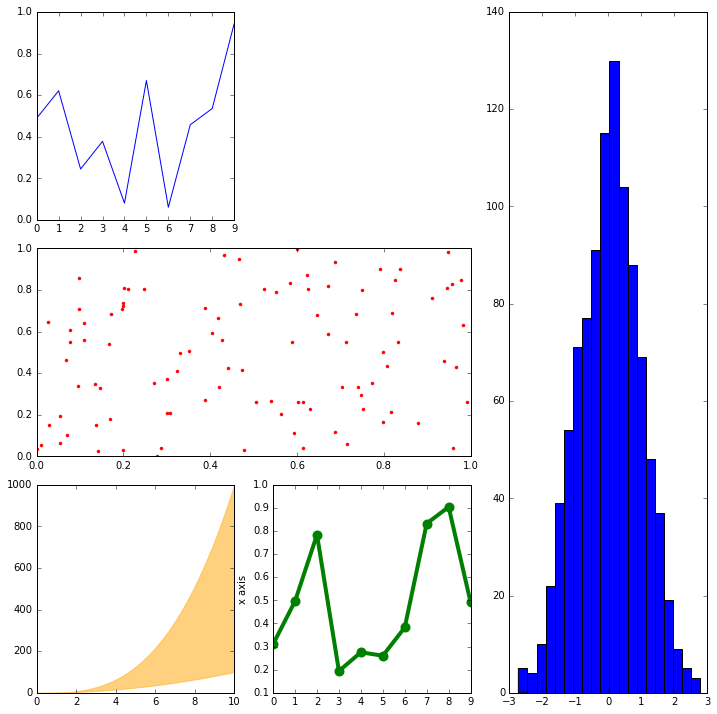

In [28]:
f = plt.figure(figsize=[10,10])
ax1 = plt.subplot2grid((3,3), (0,0), colspan=1)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (0,2), rowspan=3)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

f.subplots_adjust(wspace=0.8)
f.tight_layout() # some nice spacing!

# adding data to each plot
ax1.plot(np.random.rand(10))
ax2.plot(np.random.rand(100), np.random.rand(100), '.r')
ax3.hist(np.random.normal(size=1000), bins=20)
ax4.fill_between(x, x**2, x**3, color="orange", alpha=0.5)
ax5.plot(np.random.rand(10), c='g', lw=4, marker='o', ms=10, mec='none')
ax5.set_ylabel('x axis')

In [29]:
name = 'Matplotlib'
!jupyter nbconvert {name}.ipynb --to html

[NbConvertApp] Converting notebook Matplotlib.ipynb to html
[NbConvertApp] Writing 721283 bytes to Matplotlib.html
